In [1]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

import warnings
warnings.simplefilter('ignore')

# Load Data

In [2]:
d_parser = lambda x: pd.to_datetime(x)
df = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], date_parser=d_parser)
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [3]:
df.columns = ['ds','y']
df

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [4]:
df.shape

(144, 2)

<AxesSubplot:xlabel='ds'>

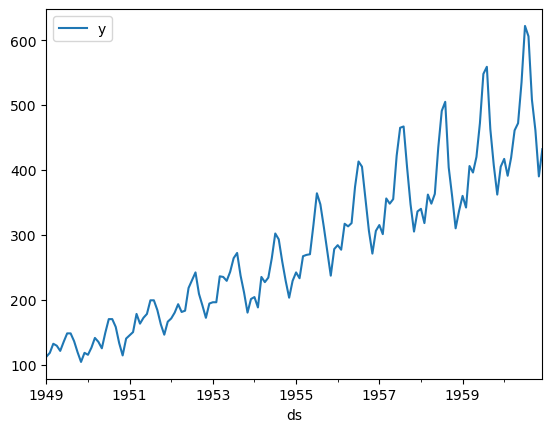

In [5]:
df.plot(x='ds', y='y')

# Train - Test Split

In [6]:
train = df.iloc[:len(df)-24]
test = df.iloc[len(df)-24:]

# Train Model

In [7]:
model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

# Forecast

In [9]:
future = model.make_future_dataframe(periods=24, freq='MS')
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
139,1960-08-01,466.173484,497.429467,545.736488,464.933405,467.302904,55.660940,55.660940,55.660940,55.660940,55.660940,55.660940,0.0,0.0,0.0,521.834424
140,1960-09-01,469.157891,458.525218,506.749179,467.779832,470.366393,13.069310,13.069310,13.069310,13.069310,13.069310,13.069310,0.0,0.0,0.0,482.227201
141,1960-10-01,472.046027,427.443600,475.866337,470.544034,473.346211,-22.156269,-22.156269,-22.156269,-22.156269,-22.156269,-22.156269,0.0,0.0,0.0,449.889757
142,1960-11-01,475.030434,398.107414,445.860853,473.430863,476.430286,-53.352646,-53.352646,-53.352646,-53.352646,-53.352646,-53.352646,0.0,0.0,0.0,421.677788
143,1960-12-01,477.918570,423.887881,471.294887,476.180715,479.407691,-29.976877,-29.976877,-29.976877,-29.976877,-29.976877,-29.976877,0.0,0.0,0.0,447.941693


In [10]:
test.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [11]:
forecast[['ds','yhat']].tail()

,ds,yhat
139,1960-08-01,521.834424
140,1960-09-01,482.227201
141,1960-10-01,449.889757
142,1960-11-01,421.677788
143,1960-12-01,447.941693


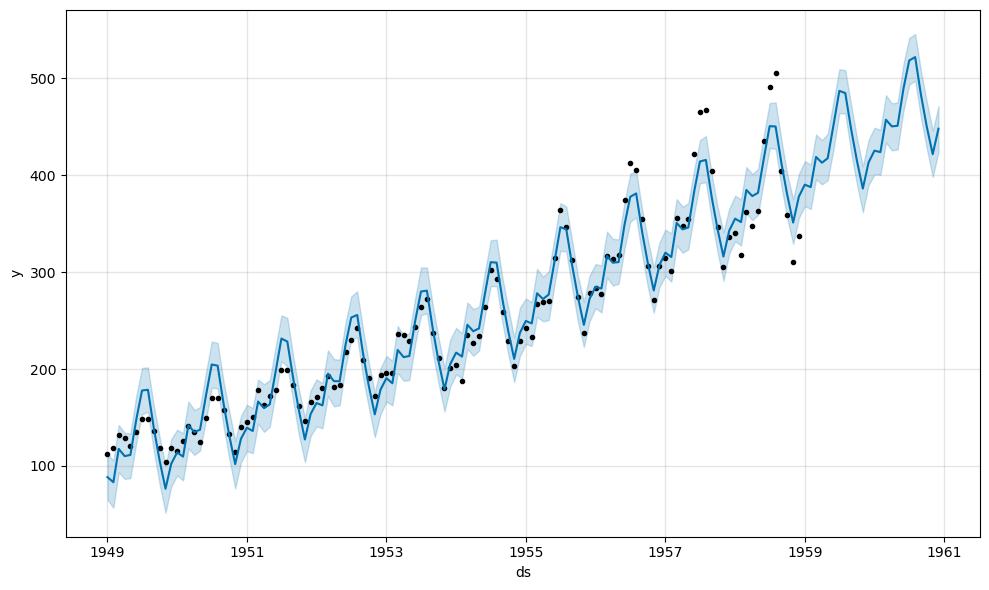

In [12]:
fig1 = model.plot(forecast)

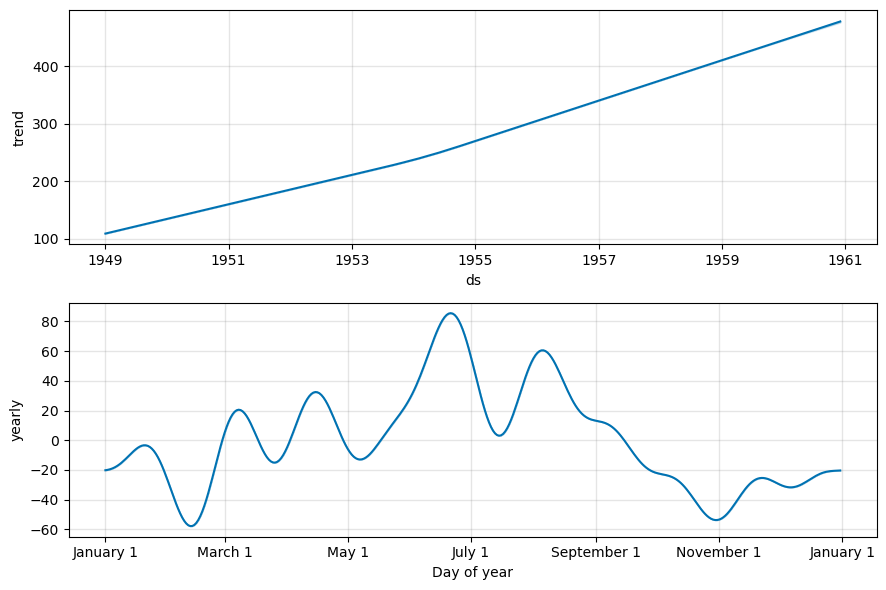

In [13]:
fig2 = model.plot_components(forecast)